In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd

Relevant data paths:

RMSE/R2 scores:
- `/scratch/dongelr1/susannar/kesa2024/results/hyytiala/scores/same_features_as_beijing`
- `/scratch/dongelr1/susannar/kesa2024/results/beijing/scores/same_features_as_hyy`



In [2]:
path_hyy = "/scratch/dongelr1/susannar/kesa2024/results2025/hyytiala"
path_bei = "/scratch/dongelr1/susannar/kesa2024/results2025/beijing"
target_dir = "/scratch/dongelr1/susannar/kesa2024/results2025"


(<matplotlib.collections.PathCollection object at 0x7f060f9528f0>, 'Train (lm)')
(<matplotlib.collections.PathCollection object at 0x7f060f952980>, 'Train (rf)')
(<BarContainer object of 4 artists>, 'lm')
(<BarContainer object of 4 artists>, 'rf')
Plot saved to /scratch/dongelr1/susannar/kesa2024/results2025/r2_rmse_all_dsets.png


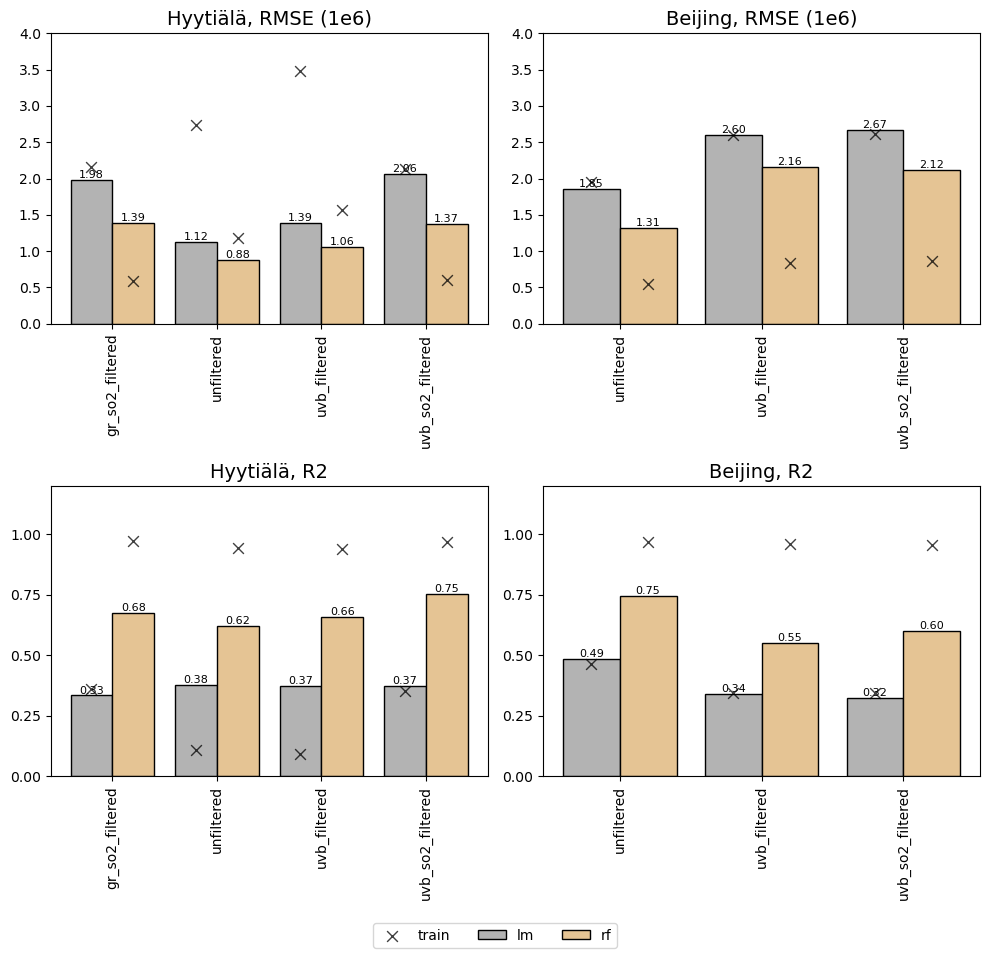

In [11]:
### Plot Hyytiälä only ###

scores_hyy = load_scores(os.path.join(path_hyy, "scores"))
scores_bei = load_scores(os.path.join(path_bei, "scores"))

#fig, axs = plt.subplots()
#plot_scores_matplotlib(scores_hyy, "RMSE", color_palette, t="Hyytiälä", ax=axs)

plt = plot_both_sites(scores_hyy, scores_bei, h=10, w=10)
save_plot(plt, os.path.join(target_dir, "r2_rmse_all_dsets.png"))

(<matplotlib.collections.PathCollection object at 0x7fc8bb85ca30>, 'Train (lm)')
(<matplotlib.collections.PathCollection object at 0x7fc8bb85d6c0>, 'Train (rf)')
(<BarContainer object of 2 artists>, 'lm')
(<BarContainer object of 2 artists>, 'rf')
Plot saved to /scratch/dongelr1/susannar/kesa2024/results2025/r2_rmse_sel_dsets.png


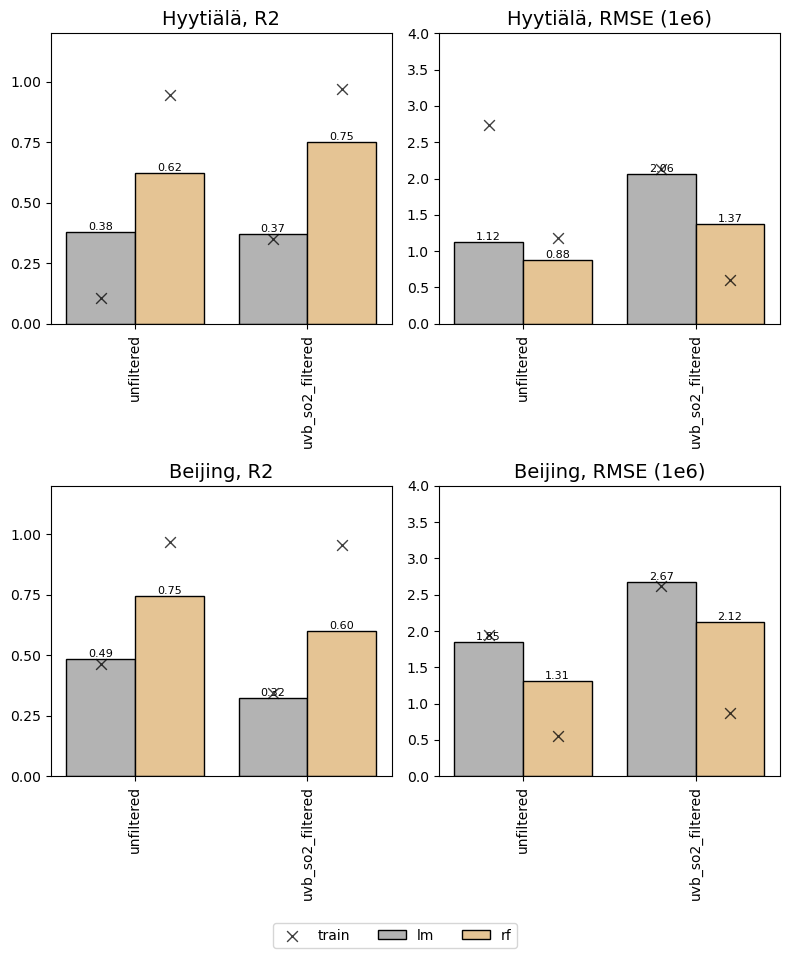

In [5]:
### Plot both sites, filtered ###

scores_hyy = load_scores(os.path.join(path_hyy, "scores"))
scores_bei = load_scores(os.path.join(path_bei, "scores"))

# Filter based on the dataset type
scores_hyy = scores_hyy.loc[scores_hyy["dataset_name"].isin(["unfiltered", "uvb_so2_filtered"])]
scores_bei = scores_bei.loc[scores_bei["dataset_name"].isin(["unfiltered", "uvb_so2_filtered"])]

#rmse_plot = plot_scores_matplotlib(scores_hyy, "RMSE", color_palette)
#r2_plot = plot_scores_matplotlib(scores_hyy, "R2", color_palette)
p = plot_both_sites(scores_hyy, scores_bei, h=10, w=8)
save_plot(p, os.path.join(target_dir, "r2_rmse_sel_dsets.png"))

### Plot functions
Different plot combinations, saving

In [3]:
def plot_both_sites(scores_hyy, scores_bei, w, h):
    fig, axs = plt.subplots(2, 2, figsize=(8, 10))  # 2 rows, 1 column
    #fig.suptitle("Hyytiälä", fontsize=16)
    #fig.suptitle("Model performance metrics", fontsize=16)
    fig.set_size_inches(w, h, forward=True)
    
    # Now draw the plots directly onto the axes
    plot_scores_matplotlib(scores_hyy, "R2", color_palette, ax=axs[0][0], show_legend=False, t="Hyytiälä")
    plot_scores_matplotlib(scores_hyy, "RMSE", color_palette, ax=axs[0][1], show_legend=False, t="Hyytiälä")
    
    plot_scores_matplotlib(scores_bei, "R2", color_palette, ax=axs[1][0], show_legend=False, t="Beijing")
    plot_scores_matplotlib(scores_bei, "RMSE", color_palette, ax=axs[1][1], show_legend=False, t="Beijing")
    
    # Create a shared legend using proxy handles from one of the plot
    handles, labels = axs[0][0].get_legend_handles_labels()
    h = []
    l = []
    for obj in zip(handles, labels):
        print(obj)
        if obj[1] in ["lm", "rf"]:
            h.append(obj[0])
            #l.append(" ".join([obj[1], "(test)"]))
            l.append(obj[1])
        elif obj[1] == "Train (lm)":
            h.append(obj[0])
            l.append("train")
    
    # Add the shared legend to the figure (e.g., below the plots)
    fig.legend(h, l, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.01))
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # leaves space for the suptitle
    #plt.show()

    return plt

def save_plot(plt, target_dir):
    #plt.savefig(os.path.join(target_dir, "r2_rmse.png"))#, dpi=300)
    plt.savefig(target_dir)
    print(f"Plot saved to {target_dir}")

### Base plotting code (do not touch!)
(Except for changing the plot y limits)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#color_palette = {'rf': '#66c2a5', 'lm': '#fc8d62'}
color_palette = {"rf": "#e5c494", "lm": "#b3b3b3"}
#color_palette = {'rf': '#66c2a5', 'lm': 'palevioletred'}
#color_palette = {'rf': 'darkseagreen', 'lm': 'lightpink'}

def load_scores(score_dir):
    all_files = [os.path.join(score_dir, f) for f in os.listdir(score_dir) if f.endswith('.csv')]
    dfs = [pd.read_csv(f) for f in all_files]
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

def plot_scores_matplotlib(data, metric, color_palette, ax=None, show_legend=True, t=""):

    if metric == "RMSE":
        data.loc[data['scoreType'] == "RMSE", 'score'] /= 1e6

    # Filter data
    test_data = data[(data['scoreType'] == metric) & (data['split'] == "Test")]
    train_data = data[(data['scoreType'] == metric) & (data['split'] == "Train")]

    dataset_names = sorted(test_data['dataset_name'].unique())
    models = sorted(test_data['model'].unique())

    # Setup positions for bar groups
    x = np.arange(len(dataset_names))  # one group per dataset
    total_width = 0.8
    bar_width = total_width / len(models)
    offset_map = {model: i for i, model in enumerate(models)}

    if ax == None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Draw bars for Test scores
    for i, model in enumerate(models):
        model_data = test_data[test_data['model'] == model]
        heights = [model_data[model_data['dataset_name'] == ds]['score'].values[0]
                   if not model_data[model_data['dataset_name'] == ds].empty else 0
                   for ds in dataset_names]
        positions = x + (i - len(models)/2) * bar_width + bar_width/2
        bars = ax.bar(positions, heights, bar_width, label=model, color=color_palette[model],
                      edgecolor='black')
        
        # Add text labels on bars
        for xpos, h in zip(positions, heights):
            if h > 0:
                ax.text(xpos, h, f'{h:.2f}', ha='center', va='bottom', fontsize=8)

    # Draw X markers for Train scores
    for i, model in enumerate(models):
        model_data = train_data[train_data['model'] == model]
        scores = [model_data[model_data['dataset_name'] == ds]['score'].values[0]
                  if not model_data[model_data['dataset_name'] == ds].empty else np.nan
                  for ds in dataset_names]
        positions = x + (i - len(models)/2) * bar_width + bar_width/2
        ax.scatter(positions, scores, color='black', marker='x', linewidth=1, alpha=0.75, s=60, label=f'Train ({model})')

    # X-axis labels
    ax.set_xticks(x)
    ax.set_xticklabels(dataset_names, rotation=90, fontsize=10)

    # Y-axis limits
    if metric == "R2":
        ax.set_ylim(0, 1.05)
        ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
        ax.set_ylim(0, 1.2)
    else:
        #max_test = test_data['score'].max()
        #max_train = train_data["score"].max()
        #max_val = max([max_test, max_train])
        #ax.set_ylim(0, max_val * 1.2)
        #ax.set_ylim(0, 3.5)
        ax.set_ylim(0, 4)

    # Title
    title = metric if metric != "RMSE" else "RMSE (1e6)"
    if len(t) > 0:
        title = ", ".join([t, title])
    ax.set_title(title, fontsize=14)

    # Legend (manually include train marker)
    legend_elements = [Patch(facecolor=color_palette[m], edgecolor='black', label=f'{m}')
                       for m in models]
    legend_elements += [Line2D([0], [0], color='black', marker='x', linestyle='None', label='Train')]

    handles, labels = ax.get_legend_handles_labels()
    
    if show_legend:
        ax.legend(handles=legend_elements, loc='upper right', ncol=len(models)+1)

    ax.set_xlabel('')
    ax.set_ylabel('')

    plt.tight_layout()
    #return fig, ax
    return ax


# Create and save combined plot
def create_and_save_score_plots(score_dir, target_dir, main_title=""):
    data = load_scores(score_dir)

    #color_palette = {'rf': '#66c2a5', 'lm': '#fc8d62'}

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    plt.suptitle(main_title, fontsize=16)

    # Plot R2
    plt.sca(axes[0])
    plot_scores_matplotlib(data, "R2", color_palette)

    # Plot RMSE
    plt.sca(axes[1])
    plot_scores_matplotlib(data, "RMSE", color_palette)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    os.makedirs(target_dir, exist_ok=True)
    plt.savefig(os.path.join(target_dir, "r2_rmse.png"), dpi=300)
    print(f"Plot saved to {target_dir}")

